# Section 29: Decision Trees

- online-ds-pt-070620
- 11/23/20


## Learning Objectives

- Data Partitioning Activity
- Decision Tree Visual Walkthrough
- Entropy and Information Gain
- Activity: Decision Trees to Predict Repeat Offender Criminals 
<!--- - [Hyperparamtere Tuning and Pruning Decision Trees](https://learn.co/tracks/data-science-career-v2/module-5-machine-learning-and-big-data/section-34-decision-trees/hyperparameter-tuning-and-pruning-in-decision-trees-lab)--->

## Questions/Comments?:

- [Google Doc](https://docs.google.com/document/d/1eiVlTxELZ8TT4aMXHEajNwPaWANX0KTlHP8qZBgMumc/edit?usp=sharing)

# Introduction to Decision Trees

## Activity: Data Partitioning

In [1]:
# !pip install -U fsds
# from fsds.imports import *
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from helper_functions import *

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import make_blobs
np.random.seed(27)
plt.style.use(['seaborn-talk'])#,'seaborn'])

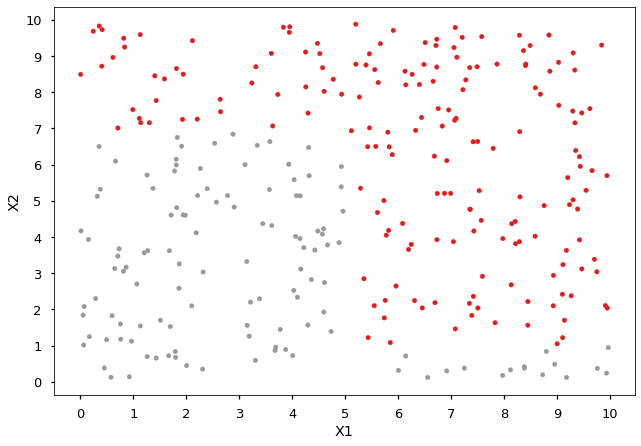

In [5]:
f,x = helper_create_plot()

### Q1: Looking at the example above, would a **vertical** or a **horizontal** cut better split the classes?

Also, what threshold should we use?

In [6]:
# 'horizontal' or 'vertical'
q1_direction = 'vertical'
# Between 0 and 10
q1_threshold = 5

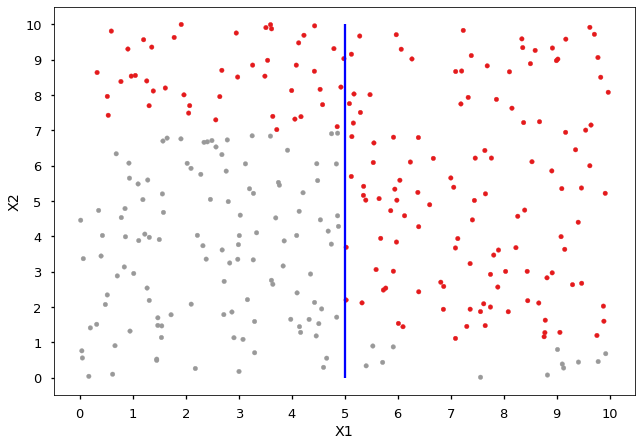

In [7]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)

#### Solution

A **vertical** cut/line would do the best to split with a threshold at about **5**

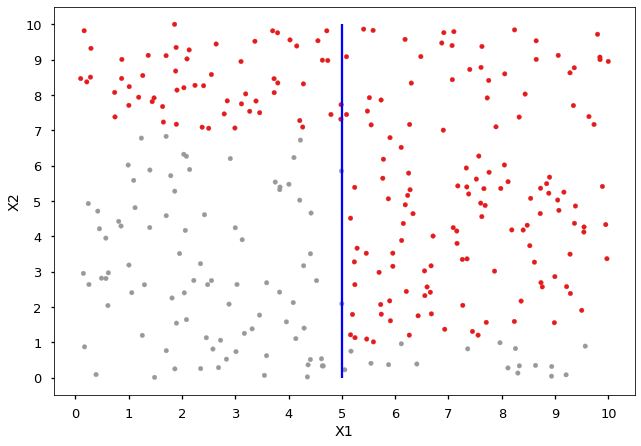

In [8]:
q1_direction = 'vertical'
q1_threshold = 5

f,ax = helper_create_plot();
create_line(ax,q1_direction, q1_threshold);

### Q2: Splitting further, what would be the next line & threshold to use?

In [9]:
# 'horizontal' or 'vertical'
q2_direction = 'horizontal'
# Between 0 and 10
q2_threshold = 7


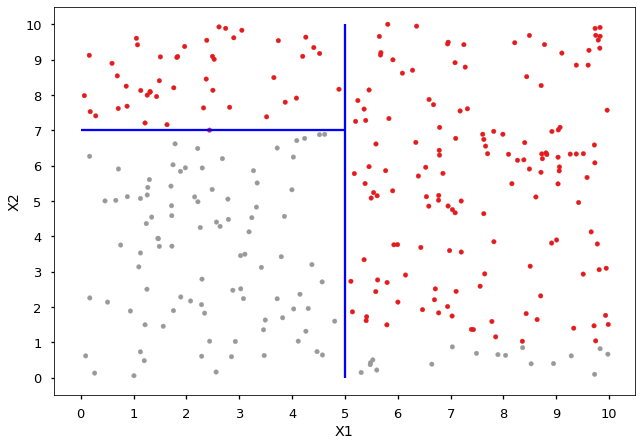

In [10]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax,q1_direction, q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

#### Solution:


A **horizontal** cut/line would do the best to split with a threshold at about **7**

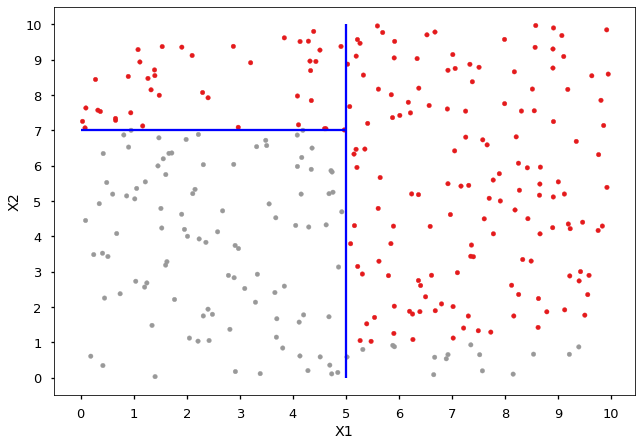

In [11]:
q2_direction = 'horizontal'
q2_threshold = 7

f,ax = helper_create_plot()
create_line(ax,q1_direction,q1_threshold)
create_line(ax,q2_direction, q2_threshold, x_range=(0, q1_threshold))

### Q3:  again.

In [12]:
# 'horizontal' or 'vertical'
q3_direction = 'horizontal'
# Between 0 and 10
q3_threshold = 1

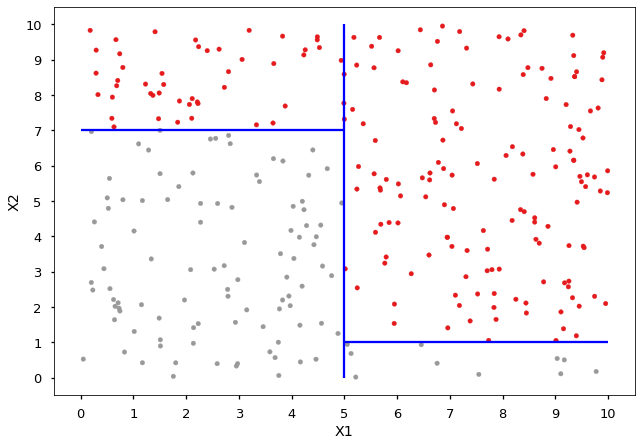

In [13]:
# Test your answer by running this cell
f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

#### Solution


A **horizontal** cut/line would do the best to split with a threshold at about **1**

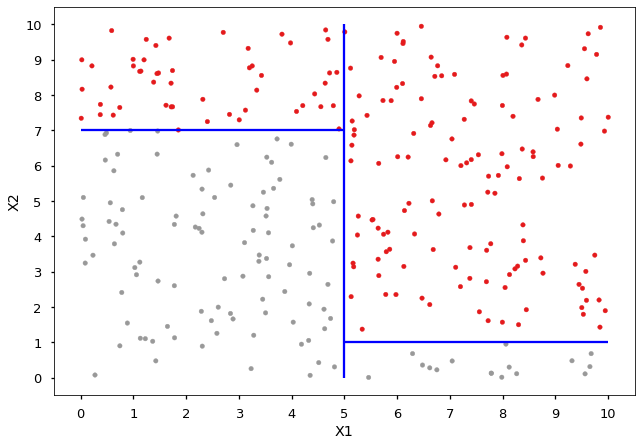

In [14]:
q3_direction = 'horizontal'
q3_threshold = 1

f,ax = helper_create_plot()
create_line(ax, q1_direction, q1_threshold)
create_line(ax, q2_direction, q2_threshold, x_range=(0, q1_threshold))
create_line(ax, q3_direction, q3_threshold, x_range=(q1_threshold, 10))

## Decision Trees Overview

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/ex-decision-tree.png" width=75%>




- **DECISION TREES:**
    - Supervised Learning
    - Classification OR Regression
    - **[Interactive Visual Demonstration](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)**


- **ADVANTAGES**
    - Interpretability 
    - Render feature importance
    - Less data pre-processing needed
    
    
- **DISADVANTAGES**
    - "Greedy search" -  short sighted optimization
    - Do not predict a continuous output (for regression)
    - Does not predict beyond range of the training data
    - Overfits SUPER easily

<!---<img src="https://raw.githubusercontent.com/learn-co-students/dsc-intro-to-supervised-learning-online-ds-ft-100719/master/images/new_ml-hierarchy.png" width=60%>--->


## Direction Acyclic Graphs (DAG) Definition


- **Direction Acyclic Graph**
> A decision tree is a DAG type of classifier where each branch node represents a choice between a number of alternatives and each leaf node represents a classification. An unknown (or test) instance is routed down the tree according to the values of the attributes in the successive nodes. When the instance reaches a leaf, it is classified according to the label assigned to the corresponded leaf.

<img src='https://raw.githubusercontent.com/jirvingphd/dsc-introduction-to-decision-trees-online-ds-pt-100719/master/images/dt1.png' width=60%>

# Entropy and Information Gain

## Entropy and decision trees


> Decision trees aim to tidy the data by separating the samples and re-grouping them in the classes they belong to.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-entropy-and-information-gain-online-ds-ft-100719/master/images/split_fs.png" width=400>

## Shannon's Entropy

> __Entropy is a measure of disorder or uncertainty.__
> 
> The entropy of a variable is the "amount of information" contained in the variable. 
>
> - We can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. 

$$\large H(S) = -\sum (P_i . log_2(P_i))$$

When  $H(S) = 0$, this means that the set $S$ is perfectly classified, meaning that there is no disorganization in our data because all of our data in S is the exact same class. 

## Information Gain


> __Information gain is an impurity/uncertainty based criterion that uses the entropy as the measure of impurity.__ 


$$Information~Gain  = Entropy_{parent} - Entropy_{child}.[child ~weighted ~average]$$


$$\large IG(A, S) = H(S) - \sum{}{p(t)H(t)}  $$

Where:

* $H(S)$ is the entropy of set $S$
* $t$ is a subset of the attributes contained in $A$ (we represent all subsets $t$ as $T$)
* $p(t)$ is the proportion of the number of elements in $t$ to the number of elements in $S$
* $H(t)$ is the entropy of a given subset $t$ 


# Decision Tree Process

1. There are features and a target (either class or value)


2. Train the tree to make a *decision* (a split) about which feature best separates the data, based on some *metric* 
    - Data are split into partitions/branches
    - Metrics include 'Gini Index', 'entropy'
    
    
3. Continue growing each branch of the tree until a stopping criterion is reached.


4. Keep doing that until a **stopping condition** is hit.
    - Number of data points in a final partition
    - Layers deep
    
5. Test the trees decisions using previously unseen data.

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-decision-trees-online-ds-ft-100719/master/images/dt3.png" width=65%>

# Implementation with sklearn

In [15]:
url="https://raw.githubusercontent.com/jirvingphd/dsc-decision-trees-with-sklearn-codealong-online-ds-pt-100719/master/tennis.csv"
df = pd.read_csv(url)
df['windy'] = df['windy'].astype(int)
df['play'] = df['play'].map({'no':0,'yes':1})
df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,0,0
1,sunny,hot,high,1,0
2,overcast,hot,high,0,1
3,rainy,mild,high,0,1
4,rainy,cool,normal,0,1


In [16]:
y = df['play'].copy()
X =  df.drop(columns=['play']).copy()
X

,outlook,temp,humidity,windy
0,sunny,hot,high,0
1,sunny,hot,high,1
2,overcast,hot,high,0
3,rainy,mild,high,0
4,rainy,cool,normal,0
5,rainy,cool,normal,1
6,overcast,cool,normal,1
7,sunny,mild,high,0
8,sunny,cool,normal,0
9,rainy,mild,normal,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=42)

In [18]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoder.fit(X_train)


X_train_ohe = encoder.transform(X_train)
X_test_ohe = encoder.transform(X_test)
X_train_ohe

array([[0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.]])

In [19]:
def remake_df(X_split, X_df,encoder):
    return pd.DataFrame(X_split, columns=encoder.get_feature_names(X_df.columns), index=X_df.index)

X_train_ohe = remake_df(X_train_ohe,X_train,encoder)
X_test_ohe = remake_df(X_test_ohe,X_test,encoder)

X_test_ohe

,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_0,windy_1
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
11,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
12,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [20]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz,plot_tree
from IPython.display import Image  
from pydotplus import graph_from_dot_data

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



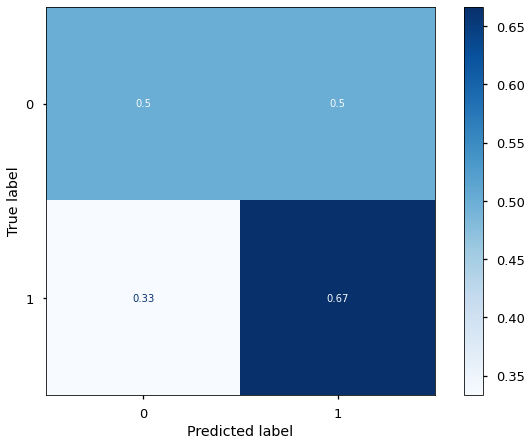

In [21]:
from sklearn import metrics
clf = DecisionTreeClassifier()#
clf.fit(X_train_ohe,y_train)
y_hat_test = clf.predict(X_test_ohe)

print(metrics.classification_report(y_test,y_hat_test))
metrics.plot_confusion_matrix(clf,X_test_ohe,y_test,cmap='Blues',
                              normalize='true')


In [22]:
metrics.accuracy_score(y_test,y_hat_test)

0.6

## Plot the decision tree 

You can see what rules the tree learned by plotting this decision tree. To do this, you need to use additional packages such as `pytdotplus`. 

> **Note:** If you are run into errors while generating the plot, you probably need to install `python-graphviz` in your machine using `conda install python-graphviz`. 

> NOTE ON INSTALLING GRAPHVIZ:
- On windows you must [download the Graphviz installer](https://www.graphviz.org/download/)(Choose the "stable" release), install it, and then add the `bin` folder inside of it to your system's Path.
- [To Edit your path on MaC](https://www.architectryan.com/2012/10/02/add-to-the-path-on-mac-os-x-mountain-lion/)

- [TO Edit Your Path on Windows (10)](https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/)

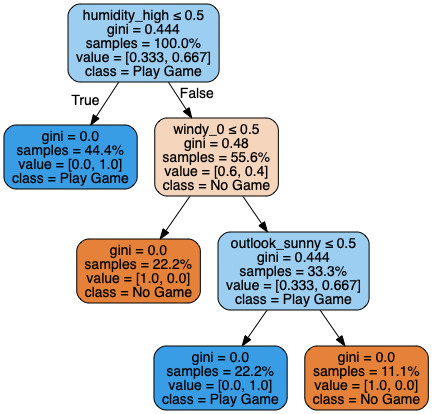

In [23]:
# Create DOT data
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X_train_ohe.columns,  
                           class_names=['No Game','Play Game'],#np.unique(y).astype('str'), 
                           filled=True, rounded=True,proportion=True,
                           special_characters=True)

# Draw graph
graph = graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [24]:
def viz_tree(clf,X_train_ohe,y):
    # Create DOT data
    dot_data = export_graphviz(clf, out_file=None, 
                               feature_names=X_train_ohe.columns,  
                               class_names=np.unique(y).astype('str'), 
                               filled=True, rounded=True,#proportion=True,
                               special_characters=True)

    # Draw graph
    graph = graph_from_dot_data(dot_data)  

    # Show graph
    return Image(graph.create_png())

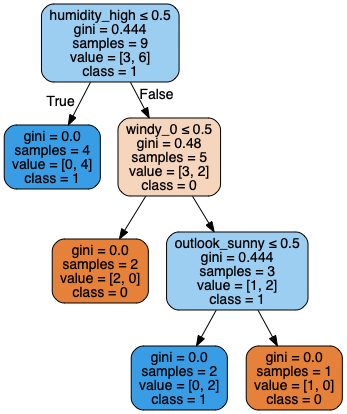

In [25]:
viz_tree(clf,X_train_ohe,y)

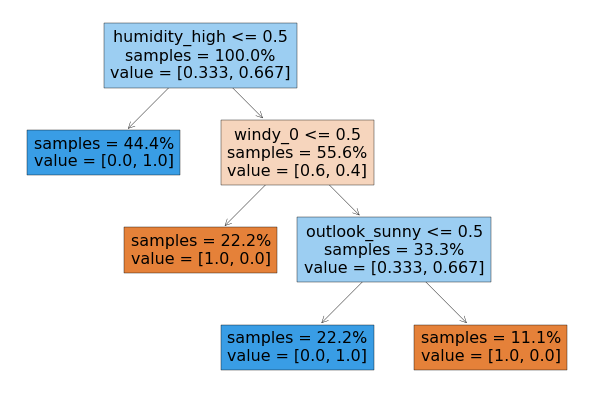

In [26]:
## Built in Implementation
from sklearn.tree import plot_tree

plot_tree(clf,feature_names=X_train_ohe.columns,filled=True,
          impurity=False,proportion=True,);

### Feature Importance

In [27]:
importance = pd.Series(clf.feature_importances_, X_train_ohe.columns)
importance

outlook_overcast    0.000000
outlook_rainy       0.000000
outlook_sunny       0.333333
temp_cool           0.000000
temp_hot            0.000000
temp_mild           0.000000
humidity_high       0.400000
humidity_normal     0.000000
windy_0             0.266667
windy_1             0.000000
dtype: float64

<AxesSubplot:>

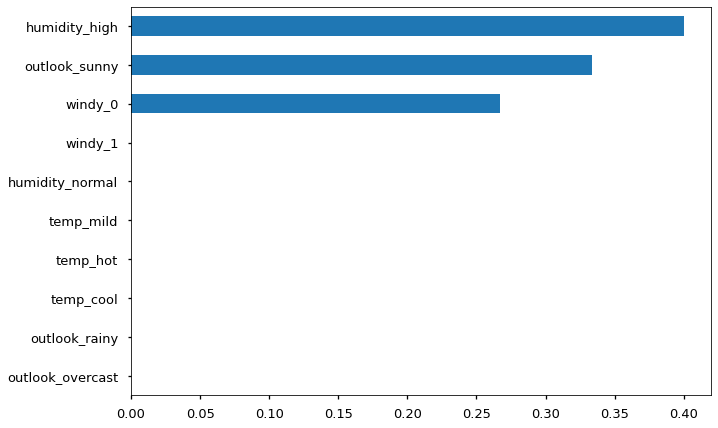

In [28]:
importance.sort_values().plot(kind='barh')

# Activity: Iowa Prisoner Recidivism

### Preprocessing Prisoners

In [29]:
prisoners = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/datasets/Iowa_Prisoners_Renamed_Columns_fsds_100719.csv"#"https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/iowa_recidivism_renamed.csv"
df = pd.read_csv(prisoners,index_col=0)
## Drop unwanted cols
df= df.drop(columns=['yr_released','report_year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race_ethnicity  25990 non-null  object
 1   age_released    26017 non-null  object
 2   crime_class     26020 non-null  object
 3   crime_type      26020 non-null  object
 4   crime_subtype   26020 non-null  object
 5   release_type    24258 non-null  object
 6   super_dist      16439 non-null  object
 7   recidivist      26020 non-null  object
 8   target_pop      26020 non-null  object
 9   sex             26017 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


In [30]:
df.head()

,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


In [31]:
df.nunique().sum()

90

### Preprocessing Data

- Null values (fill or drop)
- Data Types (finding categorical variables)
- Inspect the value_counts/labels of categoricals
- Scaling or lack-off
- Encode Them
    - Label Encoding
    - One hot encoding


race_ethnicity      30
age_released         3
crime_class          0
crime_type           0
crime_subtype        0
release_type      1762
super_dist        9581
recidivist           0
target_pop           0
sex                  3
dtype: int64

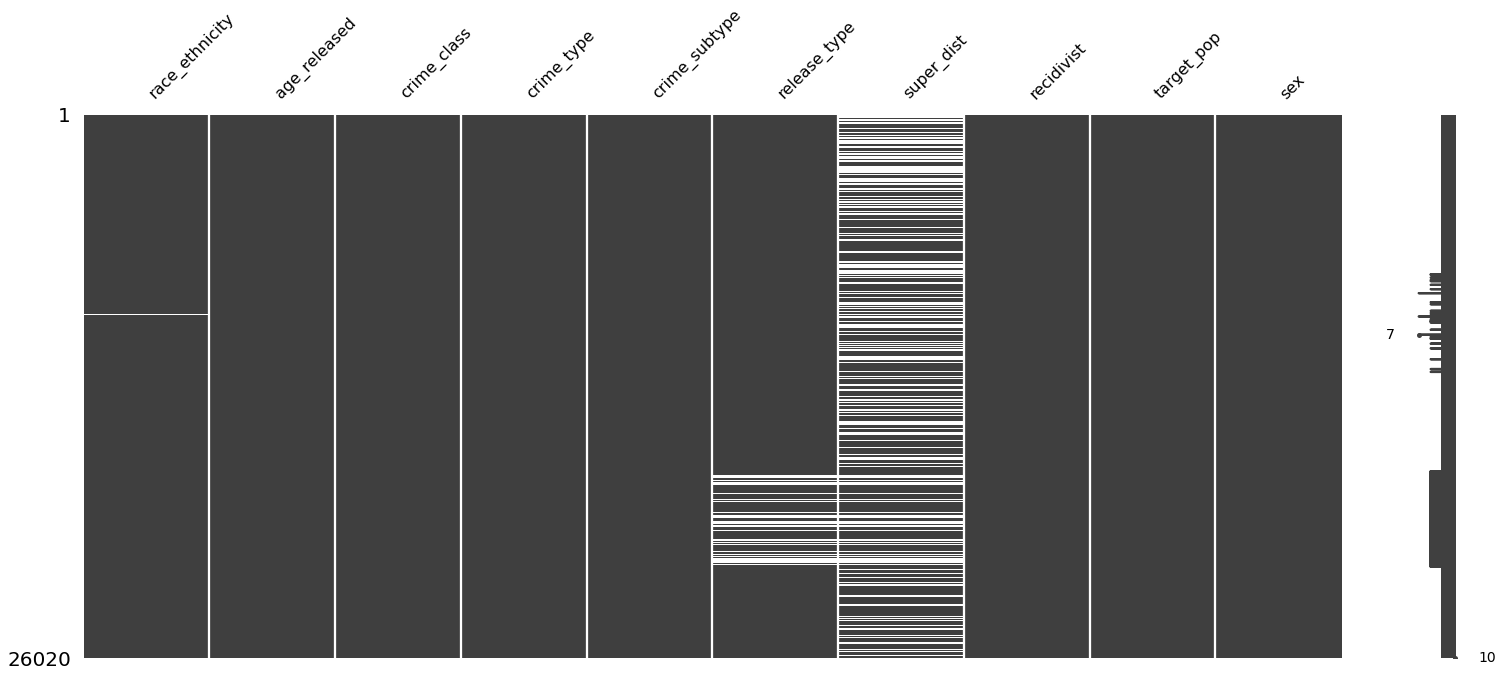

In [32]:
## Check null values
import missingno
missingno.matrix(df)
df.isna().sum()

### Simplifying Categorical Columns

In [33]:
df['race_ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
NaN                                                   30
American Indian or Alaska Native - Hispanic           20
White -                                               12
Asian or Pacific Islander - Hispanic                   5
N/A -                                                  5
Black -                                                2
Name: race_ethnicity, dtype: int64

In [34]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {
    'White - Non-Hispanic':'White',
    'Black - Non-Hispanic': 'Black',
    'White - Hispanic' : 'Hispanic',
    'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
    'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
    'Black - Hispanic' : 'Black',
    'American Indian or Alaska Native - Hispanic':'American Native',
    'White -' : 'White',
    'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
    'N/A -' : np.nan,
    'Black -':'Black'
}

df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)
df['race_ethnicity'].value_counts(dropna=False)

White                        17596
Black                         6148
Hispanic                      1522
American Native                522
Asian or Pacific Islander      197
NaN                             35
Name: race_ethnicity, dtype: int64

In [35]:
df['crime_class'].value_counts()

D Felony                                    10487
C Felony                                     6803
Aggravated Misdemeanor                       4930
B Felony                                     1765
Felony - Enhancement to Original Penalty     1533
Felony - Enhanced                             220
Serious Misdemeanor                           155
Special Sentence 2005                          98
Felony - Mandatory Minimum                     11
Other Felony                                    6
A Felony                                        4
Simple Misdemeanor                              3
Sexual Predator Community Supervision           2
Other Felony (Old Code)                         2
Other Misdemeanor                               1
Name: crime_class, dtype: int64

In [36]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)
df['crime_class'].value_counts(dropna=False)

D Felony                  10487
C Felony                   6803
Aggravated Misdemeanor     4930
B Felony                   1765
Felony - Enhanced          1753
Serious Misdemeanor         155
Sex Offender                100
NaN                          20
A Felony                      4
Simple Misdemeanor            3
Name: crime_class, dtype: int64

In [37]:
df['age_released'].value_counts(dropna=False)

25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
NaN                3
Name: age_released, dtype: int64

In [38]:
# Mapping age_map onto 'age_released'
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_numbers = (20,30,40,50,70) 
age_num_map = dict(zip(age_ranges,age_numbers))
age_num_map

{'Under 25': 20, '25-34': 30, '35-44': 40, '45-54': 50, '55 and Older': 70}

In [39]:
df['age_number'] = df['age_released'].map(age_num_map)
df['age_number'].value_counts()

30.0    9554
40.0    6223
20.0    4590
50.0    4347
70.0    1303
Name: age_number, dtype: int64

In [40]:
df.drop(columns='age_released',inplace=True)

In [41]:
df.dtypes

race_ethnicity     object
crime_class        object
crime_type         object
crime_subtype      object
release_type       object
super_dist         object
recidivist         object
target_pop         object
sex                object
age_number        float64
dtype: object

In [42]:
df.isna().sum()

race_ethnicity      35
crime_class         20
crime_type           0
crime_subtype        0
release_type      1762
super_dist        9581
recidivist           0
target_pop           0
sex                  3
age_number           3
dtype: int64

### Train-Test-Split

In [43]:
y = df['recidivist'].map({'Yes':1,'No':0})
X = df.drop(columns='recidivist')

In [44]:
y.value_counts(normalize=True)

0    0.666372
1    0.333628
Name: recidivist, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

## Train test split
X_train, X_test, y_train,y_test  = train_test_split(X,y,test_size=.3,stratify=y)

X_train

,race_ethnicity,crime_class,crime_type,crime_subtype,release_type,super_dist,target_pop,sex,age_number
5209,White,D Felony,Violent,Sex,Discharged – End of Sentence,NaN,No,Male,50.0
11487,White,D Felony,Public Order,OWI,Parole,1JD,Yes,Male,30.0
24979,Hispanic,C Felony,Drug,Trafficking,Parole Granted,7JD,No,Male,40.0
16236,White,D Felony,Drug,Trafficking,Parole Granted,8JD,Yes,Male,40.0
18775,White,D Felony,Property,Forgery/Fraud,Parole,1JD,No,Male,50.0
...,...,...,...,...,...,...,...,...,...
9310,White,Aggravated Misdemeanor,Violent,Assault,Discharged – End of Sentence,NaN,No,Male,30.0
19865,White,D Felony,Other,Other Criminal,NaN,NaN,No,Male,30.0
2603,White,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,No,Male,30.0
6705,Hispanic,D Felony,Public Order,OWI,Parole,5JD,Yes,Male,30.0


#### Pipelnes and ColumnTransformer

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [47]:
## Separate Num and Cat Cols for X_train
X_train_num_cols = X_train.select_dtypes('number')#.columns
X_train_cat_cols = X_train.select_dtypes('O')#.columns

X_train_cat_cols

,race_ethnicity,crime_class,crime_type,crime_subtype,release_type,super_dist,target_pop,sex
5209,White,D Felony,Violent,Sex,Discharged – End of Sentence,NaN,No,Male
11487,White,D Felony,Public Order,OWI,Parole,1JD,Yes,Male
24979,Hispanic,C Felony,Drug,Trafficking,Parole Granted,7JD,No,Male
16236,White,D Felony,Drug,Trafficking,Parole Granted,8JD,Yes,Male
18775,White,D Felony,Property,Forgery/Fraud,Parole,1JD,No,Male
...,...,...,...,...,...,...,...,...
9310,White,Aggravated Misdemeanor,Violent,Assault,Discharged – End of Sentence,NaN,No,Male
19865,White,D Felony,Other,Other Criminal,NaN,NaN,No,Male
2603,White,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,No,Male
6705,Hispanic,D Felony,Public Order,OWI,Parole,5JD,Yes,Male


In [48]:
## Separate Num and Cat Cols for X_test
X_test_num_cols = X_test.select_dtypes('number')#.columns
X_test_cat_cols = X_test.select_dtypes('O')#.columns
X_test_cat_cols

,race_ethnicity,crime_class,crime_type,crime_subtype,release_type,super_dist,target_pop,sex
21925,White,C Felony,Drug,Trafficking,Parole Granted,2JD,No,Male
14209,White,Aggravated Misdemeanor,Violent,Other Violent,Discharged - Expiration of Sentence,NaN,No,Female
17753,White,Felony - Enhanced,Other,Other Criminal,Parole,2JD,Yes,Male
12885,Black,Aggravated Misdemeanor,Public Order,Traffic,Parole Granted,5JD,Yes,Male
15974,Black,C Felony,Violent,Other Violent,Parole Granted,7JD,Yes,Male
...,...,...,...,...,...,...,...,...
5914,Hispanic,D Felony,Public Order,OWI,Discharged – End of Sentence,NaN,No,Male
22591,White,C Felony,Drug,Trafficking,Parole Granted,NaN,No,Male
18,Black,C Felony,Violent,Sex,Discharged – End of Sentence,NaN,No,Female
4752,White,D Felony,Property,Vandalism,Discharged – End of Sentence,NaN,No,Male


In [49]:
## Save orig column names
orig_num_cols = X_train_num_cols.columns
orig_num_cols

Index(['age_number'], dtype='object')

In [50]:
## Fill in Numerical Missing Data
num_imputer = SimpleImputer(strategy='median')
X_train_num_cols = num_imputer.fit_transform(X_train_num_cols)

X_test_num_cols = num_imputer.transform(X_test_num_cols)
X_train_num_cols

array([[50.],
       [30.],
       [40.],
       ...,
       [30.],
       [30.],
       [70.]])

In [51]:
## Make back into a dataframe
X_train_num_cols = pd.DataFrame(X_train_num_cols,columns=orig_num_cols)
X_test_num_cols = pd.DataFrame(X_test_num_cols,columns=orig_num_cols)

X_train_num_cols

,age_number
0,50.0
1,30.0
2,40.0
3,40.0
4,50.0
...,...
18209,30.0
18210,30.0
18211,30.0
18212,30.0


In [52]:
## Create an imputer and encoder for categorical data
cat_imputer = SimpleImputer(strategy='constant',fill_value='missing')
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [53]:
## Saving original column names for later
orig_cat_columns = X_train_cat_cols.columns
orig_cat_columns

Index(['race_ethnicity', 'crime_class', 'crime_type', 'crime_subtype',
       'release_type', 'super_dist', 'target_pop', 'sex'],
      dtype='object')

In [54]:
## PRocess X_train Categorical Data
X_train_cat_cols = cat_imputer.fit_transform(X_train_cat_cols)
X_train_ohe = encoder.fit_transform(X_train_cat_cols)
X_train_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [55]:
## PRocess X_train Categorical Data
X_test_cat_cols = cat_imputer.transform(X_test_cat_cols)
X_test_ohe = encoder.transform(X_test_cat_cols)
X_test_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [56]:
encoder.get_feature_names(orig_cat_columns)

array(['race_ethnicity_American Native',
       'race_ethnicity_Asian or Pacific Islander', 'race_ethnicity_Black',
       'race_ethnicity_Hispanic', 'race_ethnicity_White',
       'race_ethnicity_missing', 'crime_class_A Felony',
       'crime_class_Aggravated Misdemeanor', 'crime_class_B Felony',
       'crime_class_C Felony', 'crime_class_D Felony',
       'crime_class_Felony - Enhanced', 'crime_class_Serious Misdemeanor',
       'crime_class_Sex Offender', 'crime_class_Simple Misdemeanor',
       'crime_class_missing', 'crime_type_Drug', 'crime_type_Other',
       'crime_type_Property', 'crime_type_Public Order',
       'crime_type_Violent', 'crime_subtype_Alcohol',
       'crime_subtype_Animals', 'crime_subtype_Arson',
       'crime_subtype_Assault', 'crime_subtype_Burglary',
       'crime_subtype_Drug Possession', 'crime_subtype_Flight/Escape',
       'crime_subtype_Forgery/Fraud', 'crime_subtype_Kidnap',
       'crime_subtype_Murder/Manslaughter', 'crime_subtype_OWI',
       'cr

In [57]:
## Make X_train_ohe, X_test_ohe back into DataFrames
X_train_ohe = pd.DataFrame(X_train_ohe,columns=encoder.get_feature_names(orig_cat_columns))
X_test_ohe = pd.DataFrame(X_test_ohe,columns=encoder.get_feature_names(orig_cat_columns))

X_train_ohe

,race_ethnicity_American Native,race_ethnicity_Asian or Pacific Islander,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_White,race_ethnicity_missing,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,crime_class_C Felony,...,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,target_pop_No,target_pop_Yes,sex_Female,sex_Male,sex_missing
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18209,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18210,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18211,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18212,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [58]:
## Get X_train and X_test from column transformer
X_train_tf = pd.concat([X_train_num_cols,X_train_ohe],axis=1)
X_test_tf = pd.concat([X_test_num_cols,X_test_ohe],axis=1)
X_train_tf

,age_number,race_ethnicity_American Native,race_ethnicity_Asian or Pacific Islander,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_White,race_ethnicity_missing,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,...,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,target_pop_No,target_pop_Yes,sex_Female,sex_Male,sex_missing
0,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,40.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18209,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18210,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18211,30.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
18212,30.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Defining the Problem & Fitting a Decision Tree


### Vanilla DecisionTree (baseline)

In [59]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()#max_depth=5)

tree.fit(X_train_tf,y_train)
tree.score(X_train_tf,y_train)

0.8220599538816296

### Functions from Prior Classes

In [60]:
def evaluate_classification(model,X_test,y_test,classes=None,
                           normalize='true',cmap='Purples',label=''):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    
    Args:
        model (sklearn classifier):
        X_test (arr or df):
        y_test (arr or series):
        classes (list of str):
        normalize (str):
        cmap (str)
        label(str)
        
    Returns 
        dict: classification report dictionary output
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"
    
    ## Add Label if given
    if len(label)>0:
        table_header += f"\t{label}"
        
    
    ## PRINT CLASSIFICATION REPORT
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')
    
    
    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))
    
    report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes,
                                          output_dict=True)
    print(dashes+"\n\n")
    
    

    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Plot Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Plot Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    
    fig.tight_layout()
    plt.show()
    
    return report #fig,axes

------------------------------------------------------------
[i] CLASSIFICATION REPORT	Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12137
           1       0.84      0.57      0.68      6077

    accuracy                           0.82     18214
   macro avg       0.83      0.76      0.78     18214
weighted avg       0.82      0.82      0.81     18214

------------------------------------------------------------




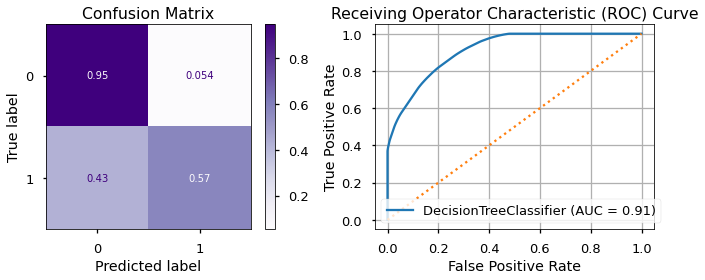

In [61]:
## Evaluate
evaluate_classification(tree,X_train_tf,y_train,label='Training Data');

------------------------------------------------------------
[i] CLASSIFICATION REPORT	Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      5202
           1       0.43      0.32      0.37      2604

    accuracy                           0.63      7806
   macro avg       0.57      0.56      0.56      7806
weighted avg       0.61      0.63      0.62      7806

------------------------------------------------------------




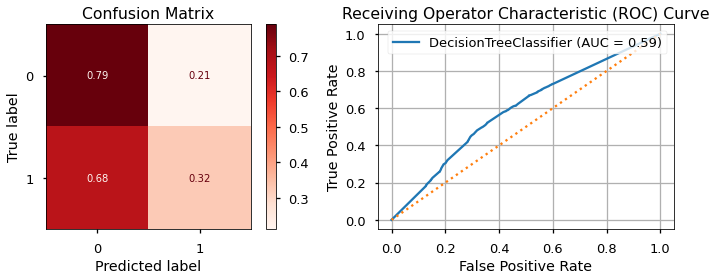

In [62]:
evaluate_classification(tree,X_test_tf,y_test,cmap='Reds',label='Test Data');

### Feature Importance

In [63]:
# def get_importances(tree):
df_import = pd.Series(tree.feature_importances_, 
                      index = X_train_tf.columns,name='Importance')
df_import.sort_values(inplace=True)
df_import

crime_class_A Felony              0.000000
crime_class_Simple Misdemeanor    0.000000
sex_missing                       0.000041
crime_subtype_Animals             0.000199
crime_subtype_Stolen Property     0.000418
                                    ...   
target_pop_Yes                    0.032149
target_pop_No                     0.033832
race_ethnicity_White              0.036604
super_dist_missing                0.078714
age_number                        0.113470
Name: Importance, Length: 76, dtype: float64

<AxesSubplot:>

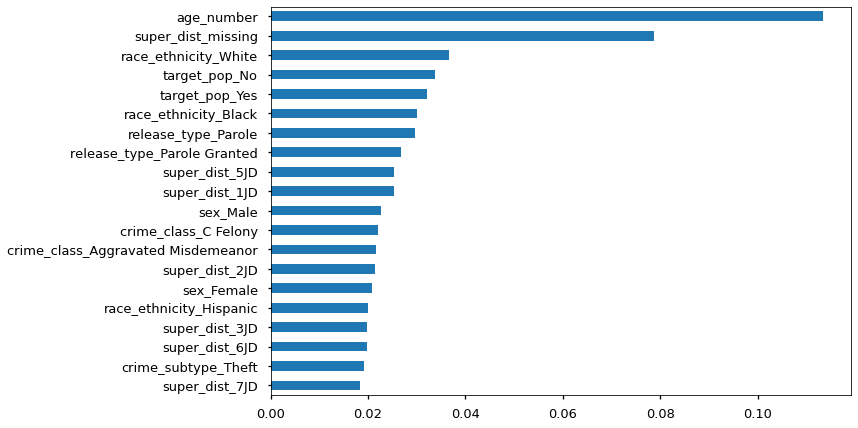

In [64]:
df_import.tail(20).plot(kind='barh')

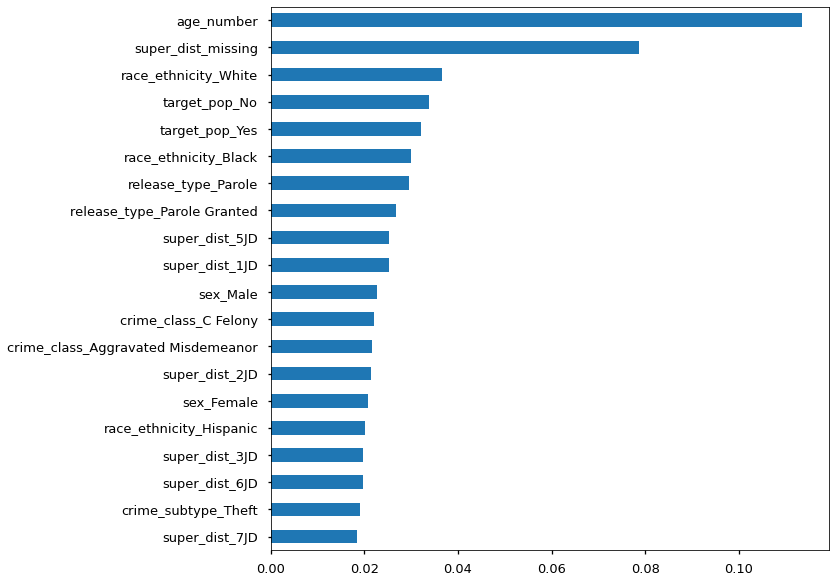

In [65]:
## Combine into a function
def plot_importance(tree, top_n=20,figsize=(10,10)):
    df_importance = pd.Series(tree.feature_importances_,index=X_train_tf.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize)
    return df_importance
plot_importance(tree);

## You can also visualize your Decision Trees

> Note: This requires installing graphviz which can be a painful installation.

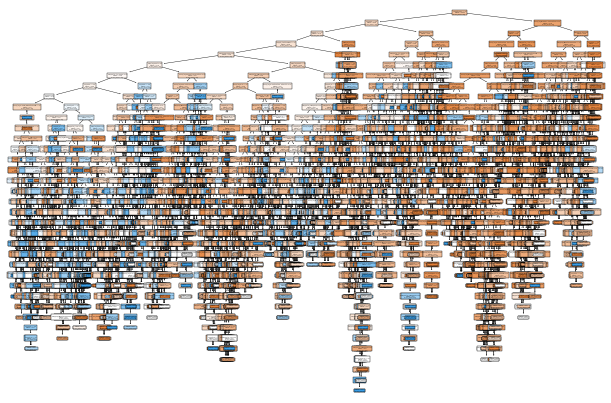

In [66]:
## Built in Implementation
from sklearn.tree import plot_tree
plot_tree(tree,feature_names=X_train_tf.columns,filled=True,
          impurity=False,proportion=True,);

In [67]:
# export_graphviz_kws={}#'out_file':'tree.png'}

# from sklearn.tree import export_graphviz
# from IPython.display import SVG
# import graphviz #import Source
# from IPython.display import display

# class_names=['Non_Recid','Yes_Recid']
# # if feature_names is None:
# feature_names=X_train_tf.columns


# tree_viz_kws =  dict(out_file=None, rotate=False, filled = True)
# tree_viz_kws.update(export_graphviz_kws)



# tree_data = export_graphviz(tree,max_depth=20,feature_names=X_train_tf.columns, 
#                                class_names=class_names,**tree_viz_kws)
# # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
# graph = graphviz.Source(tree_data,format='png')
# graph.render("tree_iowa")
# print('Complete')
# display(graph)
# # display(SVG(graph.pipe(format='svg')))

In [68]:
## visualize the decision tree
def visualize_tree(tree,feature_names=None,show=True,
                   class_names=['0','1'],format_='png',
                   kws={},save_filename=None,max_depth=20):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    import graphviz #import Source
    from IPython.display import display
    
    if feature_names is None:
        feature_names=X_train_tf.columns

    tree_viz_kws =  dict(out_file=None,rounded=True, rotate=False, filled = True)
    tree_viz_kws.update(kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    tree_data=export_graphviz(tree,feature_names=feature_names, 
                                   class_names=class_names,max_depth=max_depth,
                              **tree_viz_kws)
    graph = graphviz.Source(tree_data,format=format_)#'png')
    
    if save_filename is not None:
        graph.render(save_filename)

    if show:
        display(graph)


#     display(SVG(graph.pipe(format=format_)))#'svg')))

In [69]:
# visualize_tree(tree,feature_names=X_train_ohe.columns, save_filename='tree_example')

## Pruning our DecisionTreeClassifier

### Hyperparameters
- Useful to consider to make sure you don't overfit or underfit

Check out the scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- `max-depth`
- `min_samples_leaf`: The smallest number of samples that can be in a leaf (node)
- `min_samples_split`: The smallest number of samples in a leaf (node) before splitting it
- `max_features`: Most features to consider when splitting

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Set up param grid
params = {'max_depth':[None,5,20,30],
         'class_weight':[None,'balanced']}

## Instantiate classifier
clf = DecisionTreeClassifier()

## Instantiate GridSearchCV
gridsearch = GridSearchCV(clf,params,cv=3,scoring='recall_macro')

## Fit search
gridsearch.fit(X_train_tf,y_train)

## Print Best Params
gridsearch.best_params_

{'class_weight': 'balanced', 'max_depth': 5}

In [82]:
best_tree = gridsearch.best_estimator_
best_tree

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

------------------------------------------------------------
[i] CLASSIFICATION REPORT	Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.52      0.63     12137
           1       0.43      0.73      0.54      6077

    accuracy                           0.59     18214
   macro avg       0.61      0.63      0.59     18214
weighted avg       0.67      0.59      0.60     18214

------------------------------------------------------------




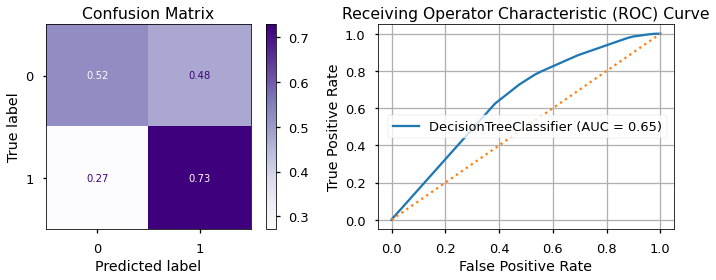

------------------------------------------------------------
[i] CLASSIFICATION REPORT	Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.50      0.61      5202
           1       0.42      0.72      0.53      2604

    accuracy                           0.57      7806
   macro avg       0.60      0.61      0.57      7806
weighted avg       0.66      0.57      0.58      7806

------------------------------------------------------------




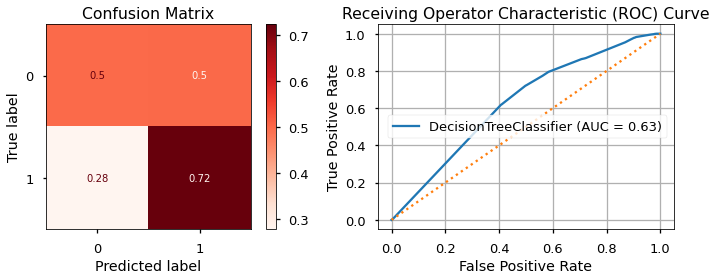

In [83]:
## Get predictions for train and test
evaluate_classification(best_tree,X_train_tf,y_train,label='Training Data');
evaluate_classification(best_tree,X_test_tf,y_test,cmap='Reds',label='Test Data');

# APPENDIX

## ADDRESSING IMBALANCED CLASSES

- Downsample/undersampling to match minority class.
- Synthetic Minority Over Sampling Technique (SMOTE)
-  Adaptive Synthetic (ADASYN)
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Downsampling_web.png" width=10%>

In [73]:
## Check class
y_train.value_counts(normalize=True)

0    0.666356
1    0.333644
Name: recidivist, dtype: float64

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_sample(X_train_tf, y_train)

In [75]:
pd.Series(y_train_res).value_counts()

1    12137
0    12137
Name: recidivist, dtype: int64

Training Score: 0.8414764768888523
------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.73      0.72      5202
           1       0.44      0.42      0.43      2604

    accuracy                           0.62      7806
   macro avg       0.57      0.57      0.57      7806
weighted avg       0.62      0.62      0.62      7806

------------------------------------------------------------




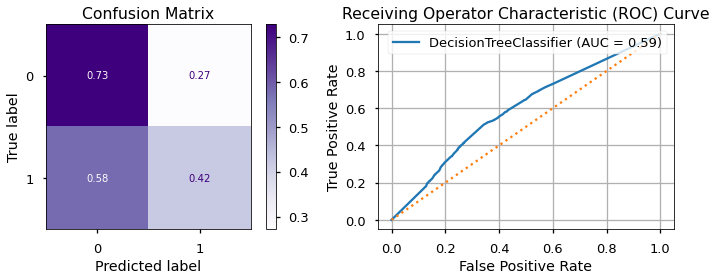

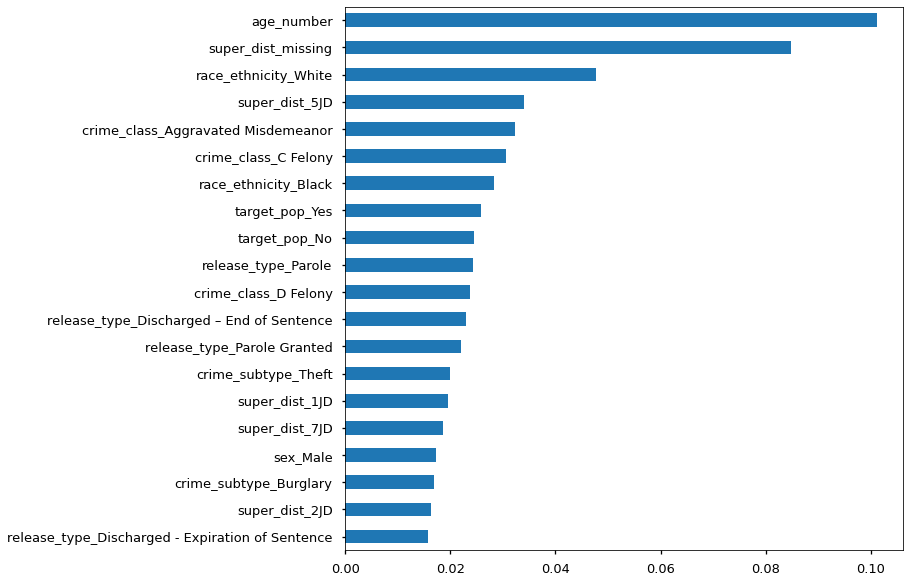

In [76]:
tree = DecisionTreeClassifier()#max_depth=5)

tree.fit(X_train_res,y_train_res)
print('Training Score:',tree.score(X_train_res,y_train_res))
evaluate_classification(tree, X_test_tf,y_test)

plot_importance(tree);

In [77]:
visualize_tree(tree,show=False,feature_names=X_train_tf.columns,save_filename='big_tree.png')